In [167]:
import pandas as pd
import matplotlib.pyplot as plt

In [168]:
data = pd.read_csv('bank/bank.csv', sep=';',header='infer')
print(data.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


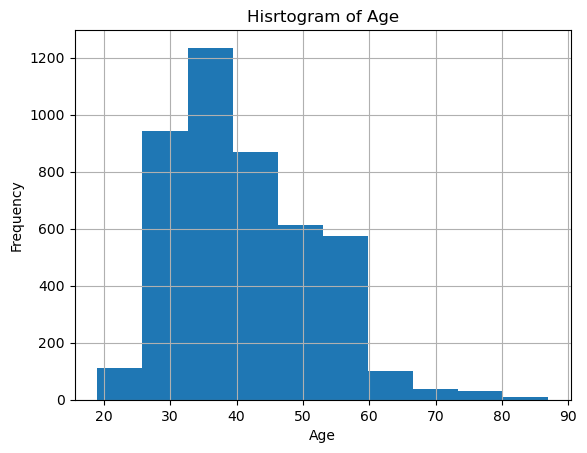

In [169]:
data.age.hist()
plt.title('Hisrtogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [170]:
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [171]:
# 選擇講義的欄位
final = data[['age','balance','loan','y']]
final.head()

,age,balance,loan,y
0,30,1787,no,no
1,33,4789,yes,no
2,35,1350,no,no
3,30,1476,yes,no
4,59,0,no,no


In [172]:
# 把物件型轉成 numeric
final['y'] = final.y.replace({'yes':1,'no':0})
final['loan'] = final['loan'].replace({'yes': 1, 'no': 0})
final.head()

C:\Users\Finn\AppData\Local\Temp\ipykernel_15856\121267493.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final['y'] = final.y.replace({'yes':1,'no':0})
C:\Users\Finn\AppData\Local\Temp\ipykernel_15856\121267493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['y'] = final.y.replace({'yes':1,'no':0})
C:\Users\Finn\AppData\Local\Temp\ipykernel_15856\121267493.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly 

,age,balance,loan,y
0,30,1787,0,0
1,33,4789,1,0
2,35,1350,0,0
3,30,1476,1,0
4,59,0,0,0


In [173]:
# 分割出 features 和 target
X = final.drop(['y'], axis=1)
y = final[['y']]
print(X.head())
print(y.head())

   age  balance  loan
0   30     1787     0
1   33     4789     1
2   35     1350     0
3   30     1476     1
4   59        0     0
   y
0  0
1  0
2  0
3  0
4  0


In [174]:
# 使用 sklearn 中的 train_test_split 分割 train data 和 test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=100)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3616, 3) (905, 3) (3616, 1) (905, 1)


In [175]:
# 嘗試使用 Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
print('score:',lr.score(X_test, y_test))
print('coef',lr.coef_)

score: 0.004811197115837107
coef [[ 9.09010659e-04  3.47935373e-07 -6.76620418e-02]]


In [176]:
# 嘗試 Decision Tree
from sklearn import tree

dt1 = tree.DecisionTreeClassifier()
dt1.fit(X_train, y_train)
print('score:',dt1.score(X_test, y_test))

score: 0.8033149171270718


In [177]:
# 新增 Hyperparameter max_depth
dt4 = tree.DecisionTreeClassifier(max_depth=4)
dt4.fit(X_train, y_train)
print('score:',dt4.score(X_test, y_test))

score: 0.8928176795580111


In [179]:
# 新增 numpy
import numpy as np

dt1.predict(np.array([[52, 2000, 1]]))

c:\Users\Finn\.conda\envs\ml_hw_conda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])